In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction

Dataset URL: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction
License(s): CC0-1.0
 87% 14.0M/16.1M [00:01<00:00, 16.8MB/s]
100% 16.1M/16.1M [00:01<00:00, 11.7MB/s]


In [ ]:
import zipfile
import os

# ganti nama file zip sesuai dataset yang diunduh
with zipfile.ZipFile("real-or-fake-fake-jobposting-prediction.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [ ]:
import pandas as pd

df = pd.read_csv("dataset/fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.shape

(17880, 18)

In [ ]:
missing_values = df.isnull().sum()
# Menggabungkan jumlah missing values dan tipe data kolom
summary = pd.concat([missing_values, df.dtypes], axis=1)
summary.columns = ['Missing Values', 'Dtype']

# Menampilkan hasil
print(summary)

                     Missing Values   Dtype
job_id                            0   int64
title                             0  object
location                        346  object
department                    11547  object
salary_range                  15012  object
company_profile                3308  object
description                       1  object
requirements                   2696  object
benefits                       7212  object
telecommuting                     0   int64
has_company_logo                  0   int64
has_questions                     0   int64
employment_type                3471  object
required_experience            7050  object
required_education             8105  object
industry                       4903  object
function                       6455  object
fraudulent                        0   int64


In [ ]:
df = df.drop(columns=['job_id'])

Heat map

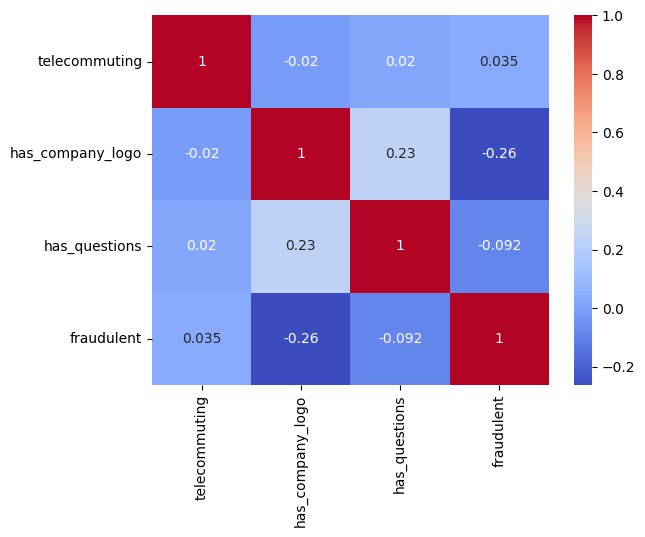

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=[float, int]).dropna()
corr = df_numeric.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Remove duplicate data

In [ ]:
df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

Creating Data Frame for object data type

In [ ]:
df.select_dtypes(include='object').columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

In [ ]:
object_columns_df = df.select_dtypes(include='object')

In [ ]:
object_columns_df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


Creating data frame for int data type\

In [ ]:
df.select_dtypes(include='int').columns
int_columns_df = df.select_dtypes(include='int')

In [ ]:
int_columns_df.head()

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0


Creating data frame for fraud type job

In [ ]:
fake = df[df['fraudulent'] == 1]

In [ ]:
fake.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
215,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


In [ ]:
real = df[df['fraudulent'] == 0]

In [ ]:
real.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df['fraudulent'].value_counts()

,count
fraudulent,
0,16743
1,856


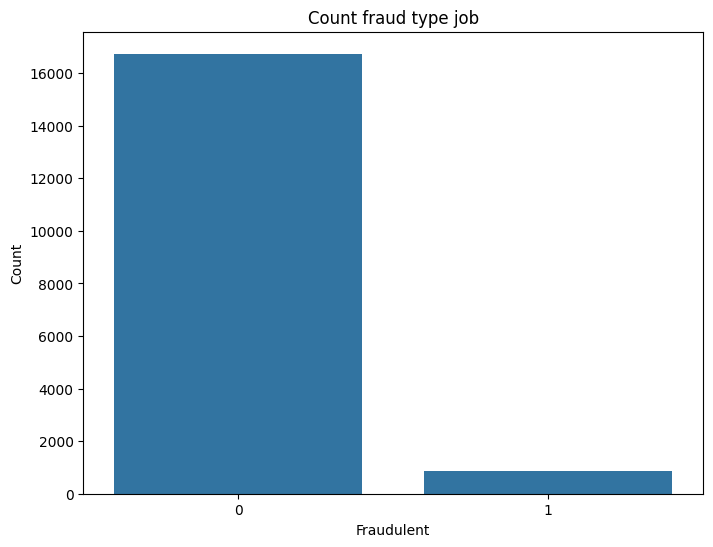

In [ ]:
fraudulent_counts = df['fraudulent'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=fraudulent_counts.index, y=fraudulent_counts.values)
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Count fraud type job')
plt.show()

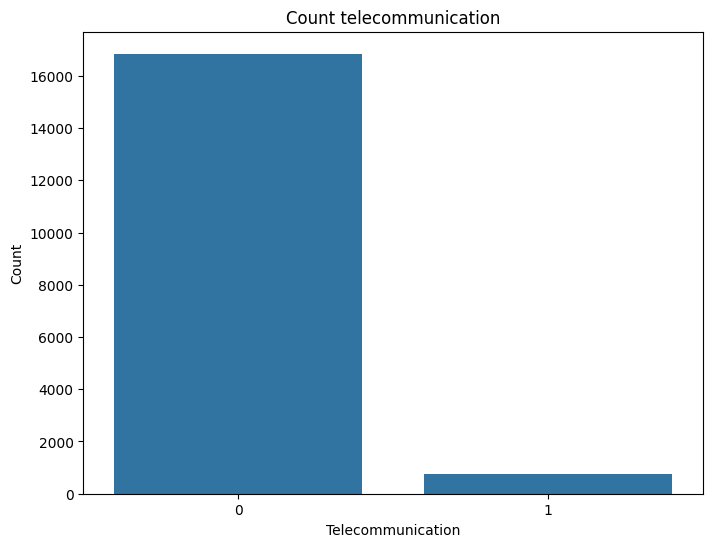

In [ ]:
telecommuting_counts = df['telecommuting'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=telecommuting_counts.index, y=telecommuting_counts.values)
plt.xlabel('Telecommunication')
plt.ylabel('Count')
plt.title('Count telecommunication')
plt.show()

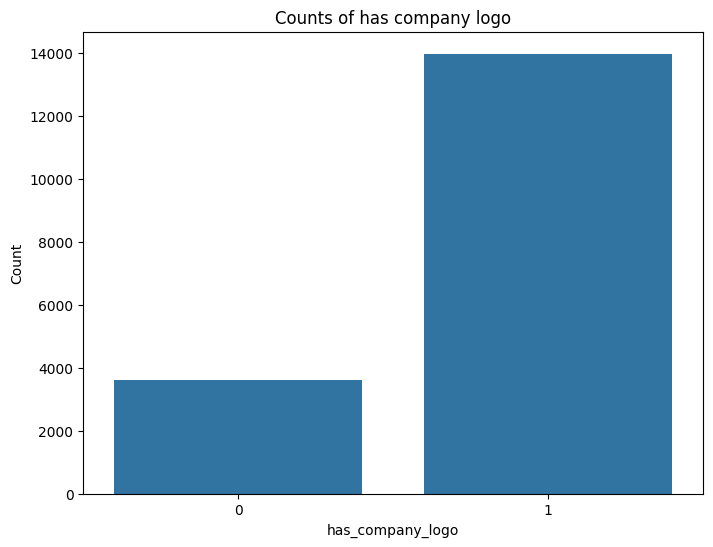

In [ ]:
has_company_logo_counts = df['has_company_logo'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=has_company_logo_counts.index, y=has_company_logo_counts.values)
plt.xlabel('has_company_logo')
plt.ylabel('Count')
plt.title('Counts of has company logo')
plt.show()

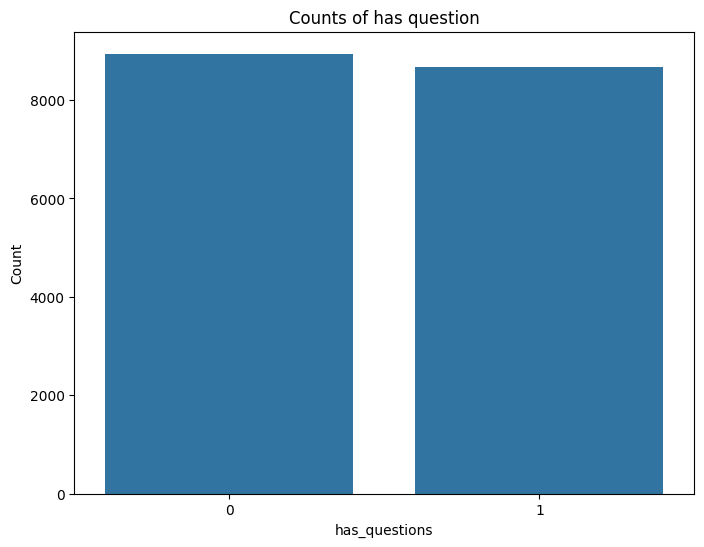

In [ ]:
has_questions_counts = df['has_questions'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=has_questions_counts.index, y=has_questions_counts.values)
plt.xlabel('has_questions')
plt.ylabel('Count')
plt.title('Counts of has question')
plt.show()

<ipython-input-25-6298a66bdd06>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='employment_type', data=df, palette="pastel", order=df['employment_type'].value_counts().index)


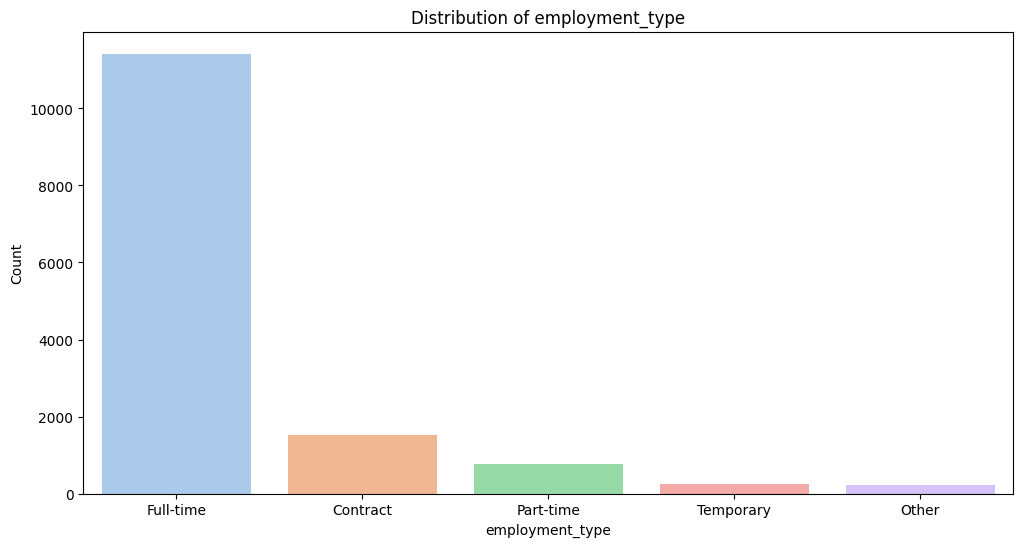

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='employment_type', data=df, palette="pastel", order=df['employment_type'].value_counts().index)
plt.title('Distribution of employment_type')
plt.xlabel('employment_type')
plt.ylabel('Count')
plt.show()

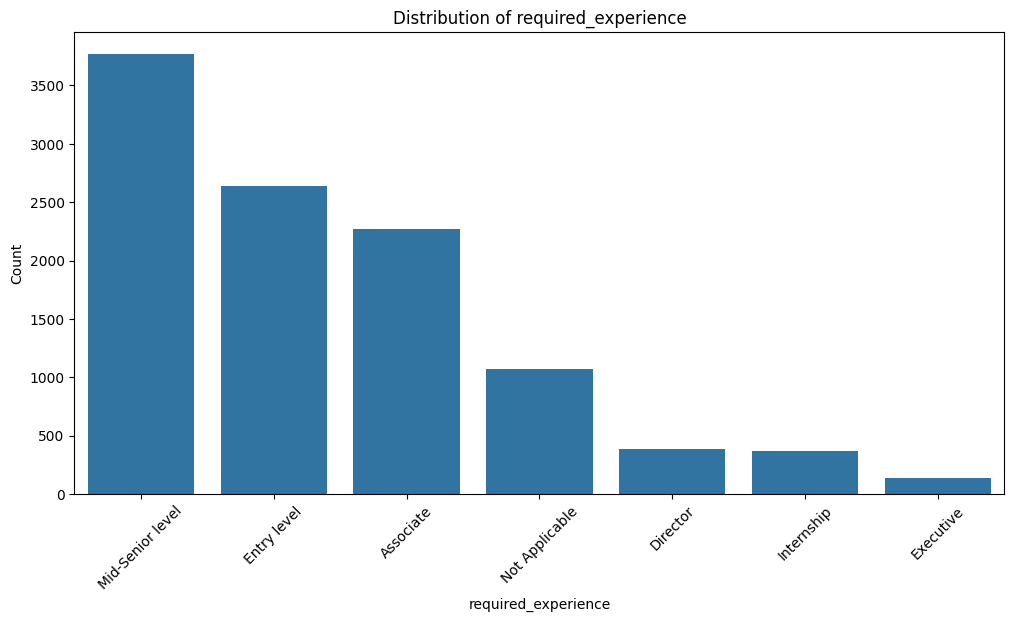

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='required_experience', data=df, order=df['required_experience'].value_counts().index)
plt.title('Distribution of required_experience')
plt.xlabel('required_experience')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

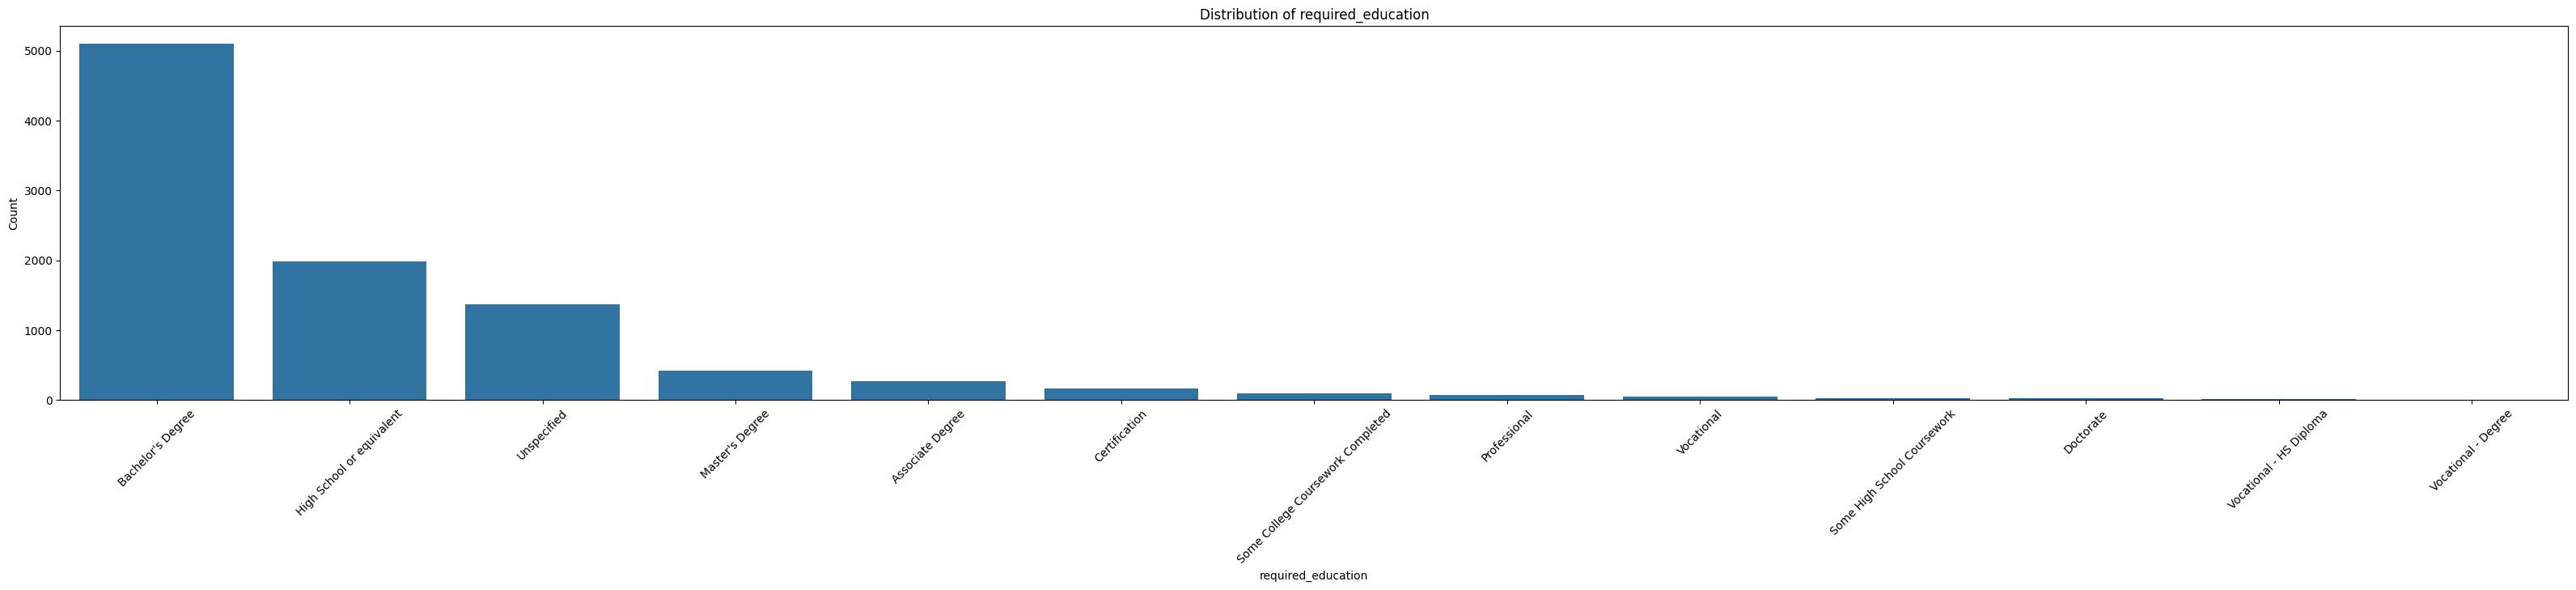

In [ ]:
plt.figure(figsize=(40, 6))
sns.countplot(x='required_education', data=df, order=df['required_education'].value_counts().index)
plt.title('Distribution of required_education')
plt.xlabel('required_education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

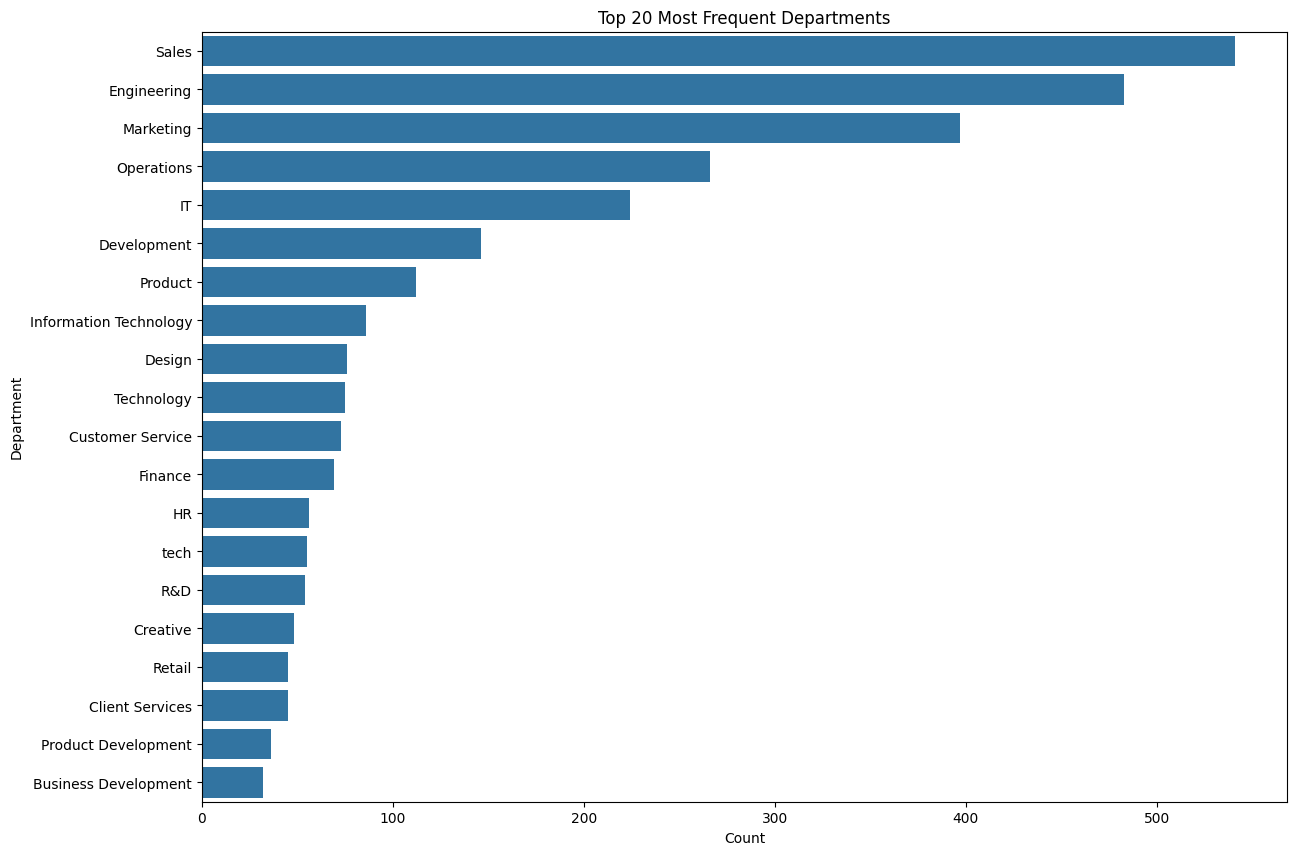

In [ ]:
department_counts = df['department'].value_counts()
top_20_departments = department_counts.head(20)
plt.figure(figsize=(14, 10))
sns.barplot(y=top_20_departments.index, x=top_20_departments.values)
plt.ylabel('Department')
plt.xlabel('Count')
plt.title('Top 20 Most Frequent Departments')
plt.show()

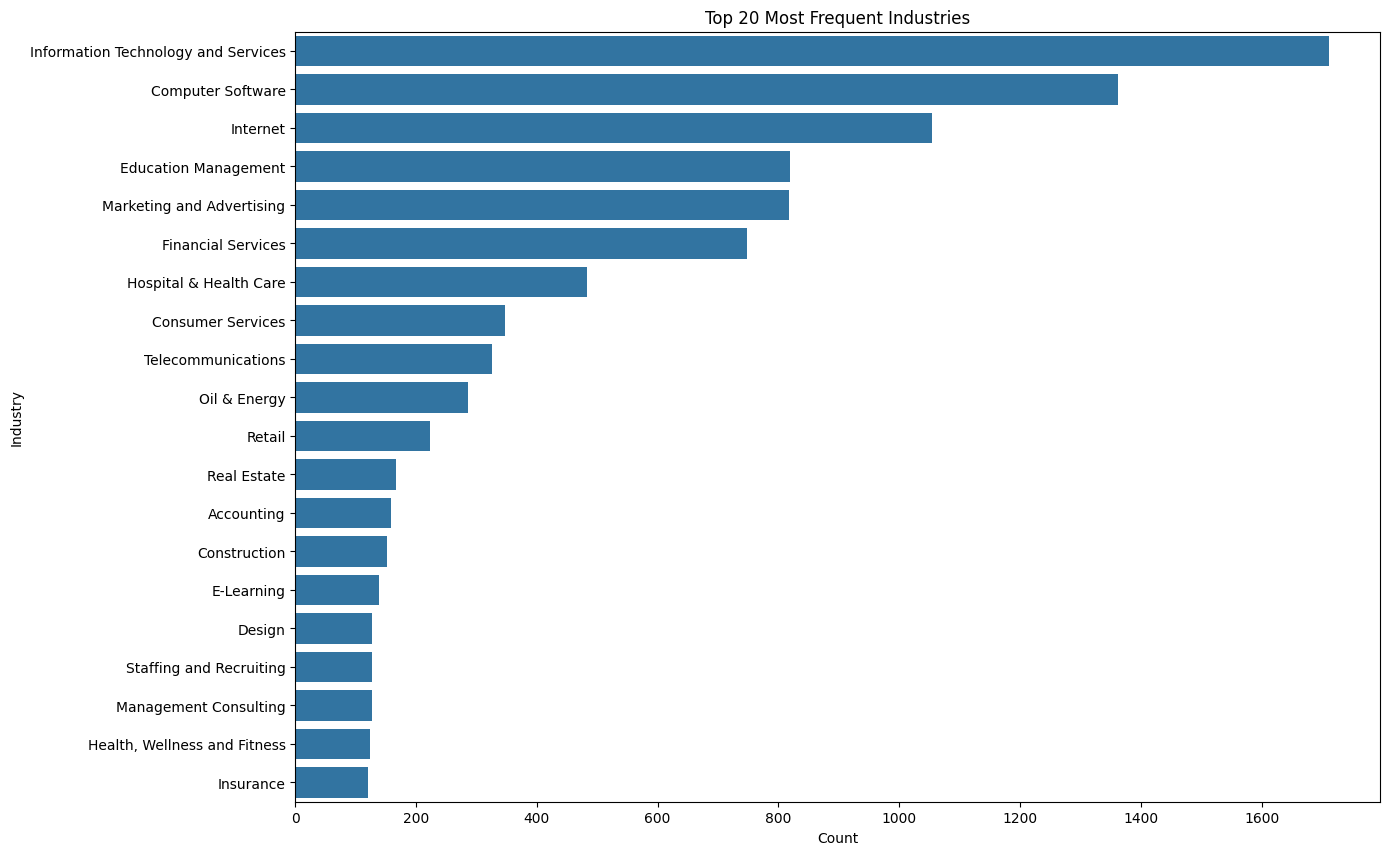

In [ ]:
industry_counts = df['industry'].value_counts()
top_20_industry = industry_counts.head(20)
plt.figure(figsize=(14, 10))
sns.barplot(y=top_20_industry.index, x=top_20_industry.values)
plt.ylabel('Industry')
plt.xlabel('Count')
plt.title('Top 20 Most Frequent Industries')
plt.show()

Split between Country and City

In [ ]:
location_split = df['location'].str.split(', ', expand=True)

# Menambahkan kolom Country, State, dan City
df['Country'] = location_split[0]
df['City'] = location_split[1]
df['State'] = location_split[2]

In [ ]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,City,State
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,,Auckland
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,IA,Wever
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


In [ ]:
missing_values = df.isnull().sum()
summary = pd.concat([missing_values, df.dtypes], axis=1)
summary.columns = ['Missing Values', 'Dtype']
print(summary)

                     Missing Values   Dtype
title                             0  object
location                        341  object
department                    11328  object
salary_range                  14772  object
company_profile                3282  object
description                       1  object
requirements                   2649  object
benefits                       7108  object
telecommuting                     0   int64
has_company_logo                  0   int64
has_questions                     0   int64
employment_type                3428  object
required_experience            6962  object
required_education             8009  object
industry                       4837  object
function                       6363  object
fraudulent                        0   int64
Country                         341  object
City                            432  object
State                           432  object


In [ ]:
missing_values = df.isna().sum()
summaryna = pd.concat([missing_values, df.dtypes], axis=1)
summaryna.columns = ['Missing Values', 'Dtype']
print(summaryna)

                     Missing Values   Dtype
title                             0  object
location                        341  object
department                    11328  object
salary_range                  14772  object
company_profile                3282  object
description                       1  object
requirements                   2649  object
benefits                       7108  object
telecommuting                     0   int64
has_company_logo                  0   int64
has_questions                     0   int64
employment_type                3428  object
required_experience            6962  object
required_education             8009  object
industry                       4837  object
function                       6363  object
fraudulent                        0   int64
Country                         341  object
City                            432  object
State                           432  object


In [ ]:
print(df[df['telecommuting'].isna()])
print(df[df['has_company_logo'].isna()])
print(df[df['has_questions'].isna()])

Empty DataFrame
Columns: [title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function, fraudulent, Country, City, State]
Index: []
Empty DataFrame
Columns: [title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function, fraudulent, Country, City, State]
Index: []
Empty DataFrame
Columns: [title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function, fraudulent, Country, City, State]
Index: []


In [ ]:
print(df['telecommuting'].isna().sum())
print(df['has_company_logo'].isna().sum())
print(df['has_questions'].isna().sum())

0
0
0


In [ ]:
df.fillna(" ", inplace=True)

In [ ]:
missing_values = df.isnull().sum()
summary = pd.concat([missing_values, df.dtypes], axis=1)
summary.columns = ['Missing Values', 'Dtype']
print(summary)

                     Missing Values   Dtype
title                             0  object
location                          0  object
department                        0  object
salary_range                      0  object
company_profile                   0  object
description                       0  object
requirements                      0  object
benefits                          0  object
telecommuting                     0   int64
has_company_logo                  0   int64
has_questions                     0   int64
employment_type                   0  object
required_experience               0  object
required_education                0  object
industry                          0  object
function                          0  object
fraudulent                        0   int64
Country                           0  object
City                              0  object
State                             0  object


In [ ]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,City,State
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,US,NY,New York
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ,,Auckland
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,US,IA,Wever
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


In [ ]:
df.shape

(17599, 21)

Combaining all column with data type "object" into 1 column namely "job_posting" with column fraud

In [ ]:
# List of columns to concatenate
columns_to_concat = ['title', 'location', 'department', 'salary_range', 'company_profile',
                     'description', 'requirements', 'benefits', 'employment_type',
                     'required_experience', 'required_education', 'industry', 'function']

# Concatenate the values of specified columns into a new column 'job_posting'
df['job_posting'] = df[columns_to_concat].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Create a new DataFrame with columns 'job_posting' and 'fraudulent'
new_df = df[['job_posting', 'fraudulent']].copy()

In [ ]:
new_df.head(10)

,job_posting,fraudulent
0,"Marketing Intern US, NY, New York Marketing ...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth Spo...",0
5,"Accounting Clerk US, MD, Job OverviewAp...",0
6,"Head of Content (m/f) DE, BE, Berlin ANDROIDPI...",0
7,"Lead Guest Service Specialist US, CA, San F...",0
8,"HP BSM SME US, FL, Pensacola Solutions3 is...",0
9,"Customer Service Associate - Part Time US, AZ...",0


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove digits
    text = re.sub(r'\d', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    text = ' '.join(words)

    return text

# Apply the combined function to the 'job_posting' column
new_df['job_posting'] = new_df['job_posting'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
new_df.head(10)

,job_posting,fraudulent
0,marketing intern us ny new york marketing food...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma us ia we...,0
3,account executive washington dc us dc washingt...,0
4,bill review manager us fl fort worth spotsourc...,0
5,accounting clerk us md job overviewapex enviro...,0
6,head content mf de berlin androidpit founded f...,0
7,lead guest service specialist us ca san franci...,0
8,hp bsm sme us fl pensacola solutions womanowne...,0
9,customer service associate part time us az pho...,0


In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

# Tokenize each job posting into words
new_df['job_posting_tokens'] = new_df['job_posting'].apply(word_tokenize)

# Tokenize each job posting into sentences
new_df['job_posting_sentences'] = new_df['job_posting'].apply(sent_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...


In [ ]:
new_df.shape

(17599, 4)

In [ ]:
new_df.columns

Index(['job_posting', 'fraudulent', 'job_posting_tokens',
       'job_posting_sentences'],
      dtype='object')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

X_flatten = [' '.join(sublist) for sublist in new_df['job_posting_tokens']]
# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_flatten)

In [ ]:
X.shape

(17599, 156678)

In [ ]:
print(X)

  (0, 79791)	4
  (0, 68236)	1
  (0, 148294)	1
  (0, 89269)	1
  (0, 87987)	5
  (0, 155964)	4
  (0, 53601)	11
  (0, 152923)	1
  (0, 29095)	1
  (0, 58360)	1
  (0, 11090)	2
  (0, 27872)	4
  (0, 126221)	1
  (0, 134929)	2
  (0, 26369)	2
  (0, 19275)	1
  (0, 61582)	3
  (0, 27883)	2
  (0, 57020)	1
  (0, 47729)	1
  (0, 86867)	1
  (0, 91046)	1
  (0, 99294)	1
  (0, 142886)	1
  (0, 40975)	2
  :	:
  (17598, 54297)	1
  (17598, 153173)	1
  (17598, 36974)	1
  (17598, 85492)	1
  (17598, 77860)	1
  (17598, 28481)	1
  (17598, 111370)	1
  (17598, 30228)	1
  (17598, 55936)	1
  (17598, 55132)	1
  (17598, 80351)	1
  (17598, 29078)	1
  (17598, 152924)	1
  (17598, 21001)	1
  (17598, 29746)	1
  (17598, 117727)	1
  (17598, 111448)	1
  (17598, 16348)	1
  (17598, 140880)	1
  (17598, 107648)	1
  (17598, 140206)	1
  (17598, 12727)	1
  (17598, 7910)	1
  (17598, 130657)	1
  (17598, 27915)	1


In [ ]:
X_flatten[2]

'commissioning machinery assistant cma us ia wever valor services provides workforce solutions meet needs companies across private sector special focus oil amp gas industry valor services involved throughout every step hiring process remain contact way final step signing employment contract new employer valor services founded vision employing unique skills experiences qualities americas finest veterans provide private sector companies precise concerted valueadded services americas finest veterans optimized career opportunitywe eager get word veterans ample opportunities employment private sector ideal candidates fill positions valor services success mission client located houston actively seeking experienced commissioning machinery assistant possesses strong supervisory skills attention detail strong dedication safety must ideal candidate execute activities complying quality requirements health environmental safety regulations implement precommissioning commissioning procedures rotary 

In [ ]:
from sklearn.decomposition import PCA

# Misalkan df_components sudah ada dari langkah sebelumnya
# Terapkan PCA pada df_components

pca_model = PCA(n_components=2)  # Mengurangi ke 2 komponen utama sebagai contoh
pca_result = pca_model.fit_transform(X.toarray())

# Ubah hasil PCA menjadi DataFrame untuk kemudahan analisis
df_pca_result = pd.DataFrame(pca_result, columns=['PCA 1', 'PCA 2'])

# Tampilkan hasilnya
print(df_pca_result.head())

      PCA 1     PCA 2
0 -0.878886 -2.341656
1  8.826303  2.682420
2 -2.940312  1.933898
3  8.578967  3.132477
4 -0.028560  3.213184


In [ ]:
df_pca_result.shape

(17599, 2)

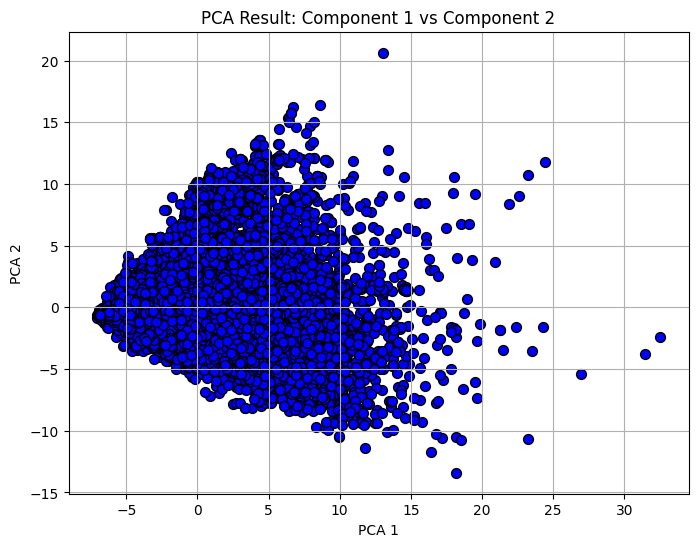

In [ ]:
import matplotlib.pyplot as plt

# Misalkan df_pca_result sudah ada dari hasil PCA sebelumnya
# Visualisasikan hasil PCA

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_result['PCA 1'], df_pca_result['PCA 2'], c='blue', edgecolor='k', s=50)
plt.title('PCA Result: Component 1 vs Component 2')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Terapkan Hierarchical Clustering pada data hasil PCA
clustering = AgglomerativeClustering(n_clusters=2)  # Misalnya, kita pilih 2 kluster
clusters = clustering.fit_predict(df_pca_result)

# Tambahkan hasil kluster ke dalam DataFrame hasil PCA
df_pca_result['Cluster'] = clusters

df_ensemble = df_pca_result[['PCA 1', 'PCA 2', 'Cluster']]

# Tampilkan hasil DataFrame dengan kolom kluster
print(df_ensemble.head())

      PCA 1     PCA 2  Cluster
0 -0.878886 -2.341656        1
1  8.826303  2.682420        0
2 -2.940312  1.933898        1
3  8.578967  3.132477        0
4 -0.028560  3.213184        1


In [ ]:
df_ensemble.shape

(17599, 3)

In [ ]:
# Gabungkan int_columns_df dengan df_reduced
df_combined = pd.concat([df_ensemble, int_columns_df], axis=1)

In [ ]:
df_combined.head()

,PCA 1,PCA 2,Cluster,telecommuting,has_company_logo,has_questions,fraudulent
0,-0.878886,-2.341656,1.0,0.0,1.0,0.0,0.0
1,8.826303,2.682420,0.0,0.0,1.0,0.0,0.0
2,-2.940312,1.933898,1.0,0.0,1.0,0.0,0.0
3,8.578967,3.132477,0.0,0.0,1.0,0.0,0.0
4,-0.028560,3.213184,1.0,0.0,1.0,1.0,0.0


In [ ]:
df_combined.shape

(17876, 7)

In [ ]:
# Menghapus baris yang memiliki missing values (NaN)
df_combined_cleaned = df_combined.dropna()

# Tampilkan beberapa baris pertama dari DataFrame yang telah dibersihkan
df_combined_cleaned.head()

# Tampilkan jumlah baris setelah penghapusan
print("Jumlah baris setelah penghapusan:", df_combined_cleaned.shape[0])

Jumlah baris setelah penghapusan: 17322


In [ ]:
missing_values = df_combined_cleaned.isna().sum()
missvalue = pd.concat([missing_values, df_combined_cleaned.dtypes], axis=1)
missvalue.columns = ['Missing Values', 'Dtype']
print(missvalue)

                  Missing Values    Dtype
PCA 1                          0  float64
PCA 2                          0  float64
Cluster                        0  float64
telecommuting                  0  float64
has_company_logo               0  float64
has_questions                  0  float64
fraudulent                     0  float64


In [ ]:
df_combined_cleaned['Cluster'] = df_combined_cleaned['fraudulent'].apply(lambda x: 1 if x == 1 else 0)

<ipython-input-280-26f5d558a395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_cleaned['Cluster'] = df_combined_cleaned['fraudulent'].apply(lambda x: 1 if x == 1 else 0)


In [ ]:
# Pisahkan X dan Y
X_new = df_combined_cleaned[['PCA 1', 'PCA 2','Cluster', 'telecommuting', 'has_company_logo', 'has_questions']]
Y_new = df_combined_cleaned['fraudulent']

# Tampilkan bentuk dari X dan Y
print("Shape of X:", X_new.shape)
print("Shape of Y:", Y_new.shape)

Shape of X: (17322, 6)
Shape of Y: (17322,)


In [ ]:
from sklearn.model_selection import train_test_split

# Misalkan df_new adalah DataFrame yang berisi kolom PCA 1, PCA 2, Cluster, dan fraudulent
# Memilih fitur (X) dan target (Y)
X = X_new
Y = Y_new

# Membagi data menjadi training dan testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Tampilkan bentuk dari X_train, X_test, Y_train, Y_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (13857, 6)
Shape of X_test: (3465, 6)
Shape of Y_train: (13857,)
Shape of Y_test: (3465,)


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
# Inisialisasi model Isolation Forest
model = IsolationForest(n_estimators=100, random_state=42, contamination=0.05)

# Melatih model pada data training (X_train)
model.fit(X_train)

# Prediksi pada data training
Y_train_pred = model.predict(X_train)

# Mengonversi hasil prediksi dari -1/1 menjadi 0/1 agar sesuai dengan Y_train
Y_train_pred = [1 if y == -1 else 0 for y in Y_train_pred]

# Tampilkan hasil evaluasi
print("Accuracy on training data:", accuracy_score(Y_train, Y_train_pred))
print(classification_report(Y_train, Y_train_pred))

Accuracy on training data: 0.9668037814822833
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     13368
         1.0       0.52      0.74      0.61       489

    accuracy                           0.97     13857
   macro avg       0.76      0.86      0.80     13857
weighted avg       0.97      0.97      0.97     13857



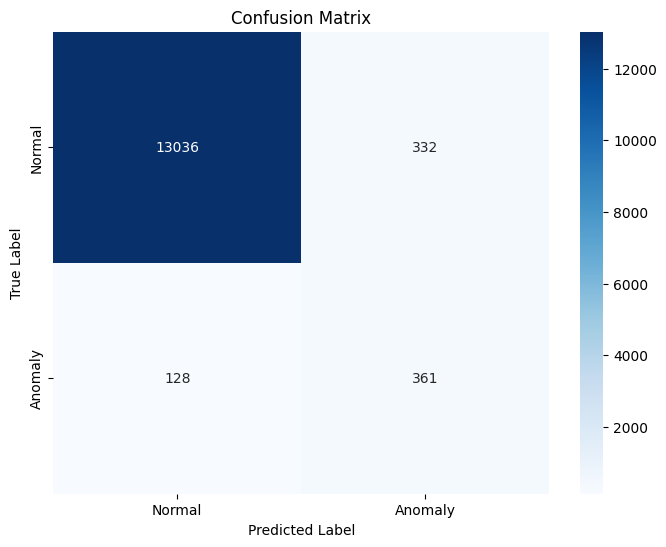

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Membuat confusion matrix
cm = confusion_matrix(Y_train, Y_train_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Melakukan prediksi pada data testing
Y_test_pred = model.predict(X_test)

# Mengonversi hasil prediksi dari -1/1 menjadi 0/1 agar sesuai dengan Y_test
Y_test_pred = [1 if y == -1 else 0 for y in Y_test_pred]
# Tampilkan hasil evaluasi
print("Accuracy on testing data:", accuracy_score(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))

Accuracy on testing data: 0.9650793650793651
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      3327
         1.0       0.55      0.72      0.62       138

    accuracy                           0.97      3465
   macro avg       0.77      0.85      0.80      3465
weighted avg       0.97      0.97      0.97      3465



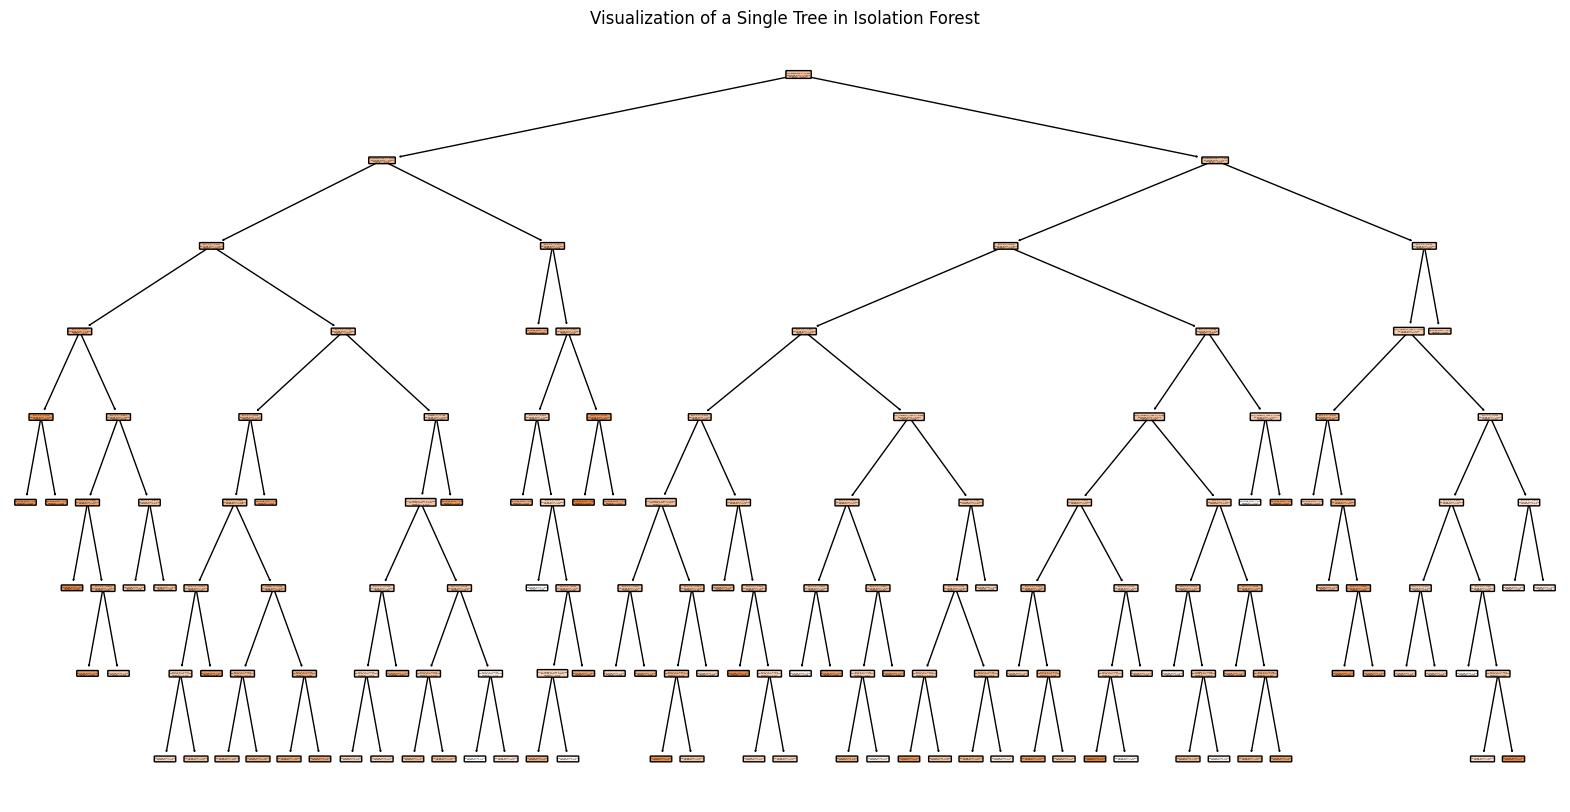

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Asumsikan model Isolation Forest telah dilatih
model = IsolationForest(n_estimators=100, random_state=42)
model.fit(X_train)

# Ekstrak salah satu pohon dari Isolation Forest (misalnya, pohon pertama)
single_tree = model.estimators_[0]

# Visualisasikan pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True, proportion=True)
plt.title('Visualization of a Single Tree in Isolation Forest')
plt.show()

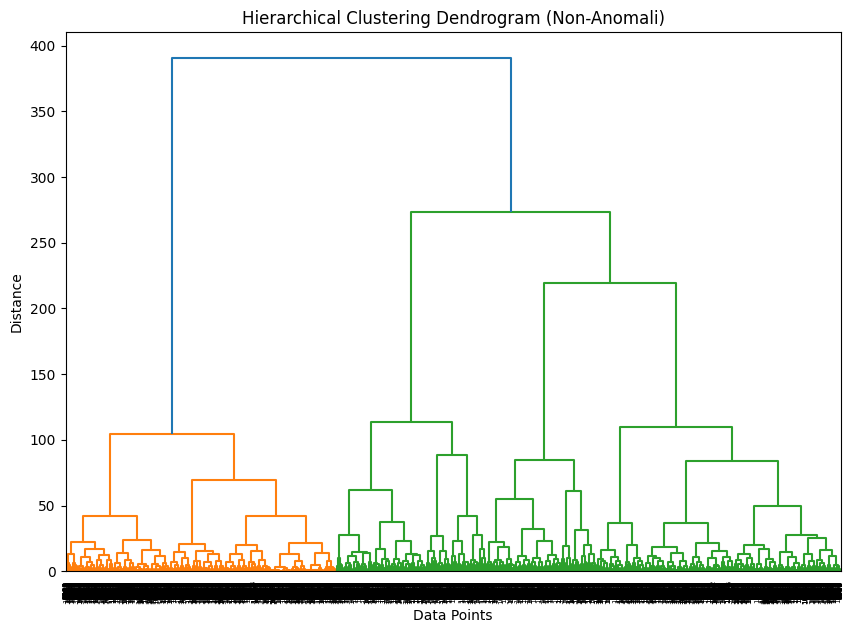

Anomali yang terdeteksi:
           PCA 1     PCA 2  Cluster  telecommuting  has_company_logo  \
7660   -6.197984 -0.413546        1            1.0               0.0   
12438   7.542623  9.671026        0            0.0               1.0   
937    -3.539581  0.359067        1            0.0               1.0   
7148   -4.801440 -0.107337        1            0.0               1.0   
9955    8.052225 -6.544507        0            0.0               1.0   
...          ...       ...      ...            ...               ...   
11526   6.678915 -0.515956        0            0.0               0.0   
2442   -1.274008 -0.618713        0            0.0               0.0   
4448   -6.879585 -0.679298        1            0.0               0.0   
17115  -2.761704 -1.845260        0            0.0               0.0   
5415   11.878188 -2.311925        0            0.0               0.0   

       has_questions  
7660             0.0  
12438            1.0  
937              1.0  
7148             1

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Prediksi pada data training menggunakan model yang sudah dilatih
Y_train_pred = model.predict(X_train)

# Mengonversi hasil prediksi dari -1/1 menjadi 0/1 agar sesuai dengan Y_train
Y_train_pred = np.array([1 if y == -1 else 0 for y in Y_train_pred])

# Pisahkan data berdasarkan hasil prediksi
X_train_non_anomali = X_train[Y_train_pred == 0]
X_train_anomali = X_train[Y_train_pred == 1]

# Terapkan Hierarchical Clustering pada data non-anomali
Z = linkage(X_train_non_anomali, method='ward')

# Visualisasikan dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Non-Anomali)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Analisis data anomali (jika diperlukan)
print("Anomali yang terdeteksi:")
print(X_train_anomali)